In [ ]:
#ToDo - Total spent - essentially just combine all the spending rows into one 
#Also - find a better way of filling missing data points -currently just deleting them

In [93]:
#So firstly read in all the data - Ha imports I mean 
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import neighbors 
import math
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification





4277


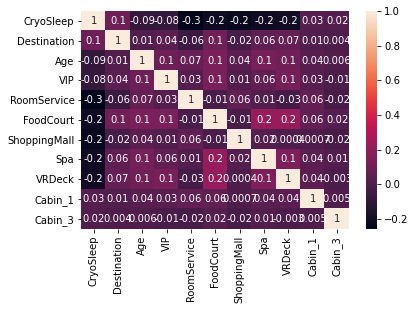

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_1,Cabin_2,Cabin_3
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,2,0,1
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,2,0,1
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,1


In [98]:

path = '/Users/alextaylor/Desktop/spaceship-titanic'

train = pd.read_csv(path+'/train.csv').dropna()

test = pd.read_csv(path+'/test.csv') #.dropna()

print(len(test))

vals = {True:1,False:0,'Europa':0,'Earth':'1','Mars':2,'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2,math.nan:0,'P':0,'S':1,'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'C':5, 'D':6, 'T':7}


train_label = train['Transported']

#Need to find a way to get cabin
#Each cabin has 3 values - split into cabin 1,2 and 3 cols

train = cabin(train)

test = cabin(test)

train = train.replace(vals)
test = test.replace(vals)

#Split off the results 
dropper = ['Name','PassengerId','Cabin','Transported']
for i in dropper:
    train = train.drop(i,1)
    if i == 'PassengerId':
        test_pass = test['PassengerId']
    
    if i != 'Transported':
        test = test.drop(i,1)

sns.heatmap(train.corr(), annot=True, fmt='.1g')
plt.show()

train.head()

In [64]:

def cabin(df):
    
    #Each cabin has 3 values - split into cabin 1,2 and 3 cols

    cabin = df.Cabin
    cabin_1 = []
    cabin_2 = []
    cabin_3 = []

    for i in cabin:
        #print(type(i))

        try:
            #print(i)
            j = i.split('/')

            cabin_1.append(j[0])
            cabin_2.append(j[1])
            cabin_3.append(j[2])
        except:
            cabin_1.append(0)
            cabin_2.append(1)
            cabin_3.append(0)
            
    #print(cabin_1)
    df['Cabin_1'] = cabin_1
    df['Cabin_2'] = cabin_2
    df['Cabin_3'] = cabin_3
        

    return df

In [106]:
#Random forest approach - need to test depths! 

#depth of 4 is better - what about 8? - Depth maxes out at 4! 

clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(train, train_label)

res = clf.predict(test) 

In [102]:
#So now that it is read in lets start basic - KNN  
knn = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski')

fit = knn.fit(train,train_label)

res = knn.predict(test)

f = open(path+'/results.csv', 'w')
f.write('PassengerId,Transported\n')
k = 0


In [105]:
#output results 

f = open(path+'/results.csv', 'w')
f.write('PassengerId,Transported\n')
k = 0


for i in test_pass:
    #print(k)
    
    f.write(str(i) + ',' + str(res[k]) + '\n')
    k += 1

print(k)

4277
